# Analiza podatkov

Avtorica: Neža Zupančič

Vsi podatki, ki so bili uporabljeni v projektni nalogi, so bili zbrani iz spletne strani: [Basketball reference](https://www.basketball-reference.com/)
Gre za statistične podatke igralcev lige NBA za zadnjih 25 let. Ta statistika predstavlja sezonska povprečja. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

tabela_podatkov = pd.read_csv("pridobivanje_podatkov/podatki.csv")

## Podatki

Za začetek si oglejmo tabelo podatkov.


In [3]:
tabela_podatkov

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
0,1,Shaquille O'Neal,27,LAL,C,79,79,40.0,12.1,21.1,...,9.4,13.6,3.8,0.5,3.0,2.8,3.2,29.7,"MVP-1,DPOY-2,AS,NBA1,DEF2",2000
1,2,Allen Iverson,24,PHI,SG,70,70,40.8,10.4,24.8,...,2.8,3.8,4.7,2.1,0.1,3.3,2.3,28.4,"MVP-7,AS,NBA2",2000
2,3,Grant Hill,27,DET,SF,74,74,37.5,9.4,19.2,...,5.3,6.6,5.2,1.4,0.6,3.2,2.6,25.8,"MVP-8,AS,NBA2",2000
3,4,Vince Carter,23,TOR,SF,82,82,38.1,9.6,20.7,...,4.0,5.8,3.9,1.3,1.1,2.2,3.2,25.7,"MVP-10,AS,NBA3",2000
4,5,Karl Malone,36,UTA,PF,82,82,35.9,9.2,18.0,...,7.4,9.5,3.7,1.0,0.9,2.8,2.8,25.5,"MVP-4,AS,NBA2",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15153,568,Danny Green,36,PHI,SG,2,0,9.0,0.0,1.0,...,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0,NaN,2024
15154,569,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,2024
15155,570,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024
15156,571,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024


## Povprečno število točk

Zanima me ali se povprečje v zadnjih 25 letih povečuje ali ne.

### Top 10

Najprej me zanima povprečje doseženih točk najboljših pet igralcev v vsakih sezoni.

In [13]:
top5_igralcev = (tabela_podatkov.groupby("Year", group_keys=False)
                  .apply(lambda x: x.nlargest(5, "PTS"))
)

print(top5_igralcev[["Year", "Player", "PTS"]])

       Year                   Player   PTS
0      2000         Shaquille O'Neal  29.7
1      2000            Allen Iverson  28.4
2      2000               Grant Hill  25.8
3      2000             Vince Carter  25.7
4      2000              Karl Malone  25.5
...     ...                      ...   ...
14423  2024              Joel Embiid  34.7
14424  2024            Luka DonÄiÄ  33.9
14425  2024    Giannis Antetokounmpo  30.4
14426  2024  Shai Gilgeous-Alexander  30.1
14427  2024            Jalen Brunson  28.7

[125 rows x 3 columns]


C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_11084\1940459948.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "PTS"))


In [14]:
povprečje_top5 = (
    top5_igralcev
    .groupby("Year")["PTS"]
    .mean()
)

povprečje_top5

Year
2000    27.02
2001    29.14
2002    27.16
2003    28.62
2004    25.36
2005    27.82
2006    31.26
2007    29.50
2008    27.12
2009    27.42
2010    28.32
2011    26.36
2012    26.52
2013    27.36
2014    27.60
2015    26.12
2016    27.90
2017    29.08
2018    27.96
2019    29.34
2020    30.78
2021    29.74
2022    29.82
2023    32.04
2024    31.56
Name: PTS, dtype: float64

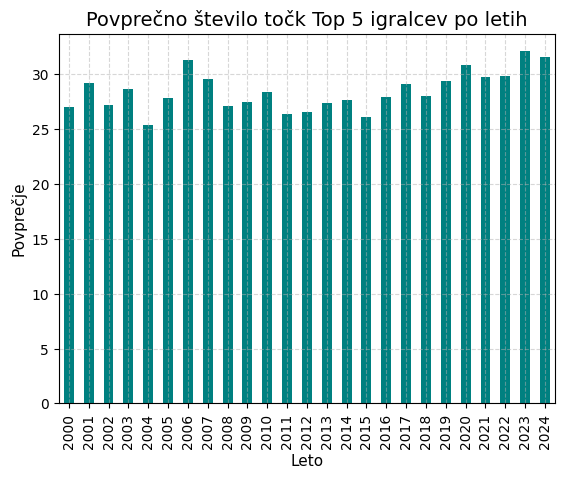

In [22]:
povprečje_top5.plot(x="Year", y="mean", kind="bar", color="teal")
plt.title("Povprečno število točk Top 5 igralcev po letih", fontsize=14)
plt.xlabel("Leto", fontsize=11)
plt.ylabel("Povprečje", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Povprečje vseh igralcev v vsakem letu

In [8]:
povprečje = tabela_podatkov.groupby("Year")["PTS"].mean()
najboljše_leto = povprečje.idxmax()
najslabše_leto = povprečje.idxmin()

print(f"Najboljše leto: {najboljše_leto}")
print(f"Najslabše leto: {najslabše_leto}")

Najboljše leto: 2023
Najslabše leto: 2004


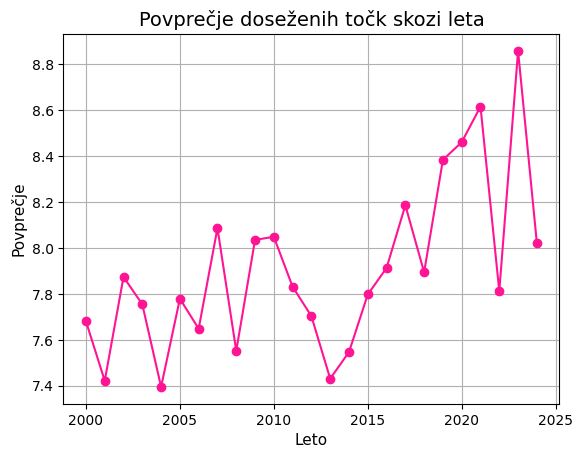

In [17]:
povprečje.plot(x="Year", y="mean", kind="line", legend=False, marker="o", color="deeppink")
plt.title("Povprečje doseženih točk skozi leta", fontsize=14)
plt.xlabel("Leto",fontsize=11)
plt.ylabel("Povprečje",fontsize=11)
plt.grid()
plt.show()

## Povprečna starost igralcev

Zanima me povprečna starost igralcev v vsakem letu in če se ta kaj povečuje.

In [ ]:
povprečna_starost = tabela_podatkov.groupby("Year")["Age"].mean()
povprečna_starost.plot(x="Year")